In [1]:
import torch
import os
from torch import nn
import matplotlib.pyplot as plt

In [2]:
if torch.cuda.is_available():
    device = torch.device("cuda")
else:
    device = torch.device("cpu")
device

device(type='cpu')

In [3]:
class Generator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(100, 256),
            nn.ReLU(),
            nn.Linear(256, 512),
            nn.ReLU(),
            nn.Linear(512, 1024),
            nn.ReLU(),
            nn.Linear(1024, 784),
            nn.Tanh(),
        )

    def forward(self, x):
        output = self.model(x)
        output = output.view(x.size(0), 1, 28, 28)
        return output

In [4]:
def produce_plot(model_path):
    generator = Generator().to(device=device)
    generator.load_state_dict(torch.load(model_path, map_location=device))
    
    batch_size = 32
    
    latent_space_samples = torch.randn(batch_size, 100).to(device=device)
    generated_samples = generator(latent_space_samples)
    
    generated_samples = generated_samples.cpu().detach()
    for (i, image) in enumerate(generated_samples[0:16]):
        ax = plt.subplot(4, 4, i + 1)
        plt.imshow(image.reshape(28, 28), cmap="gray_r")
        plt.xticks([])
        plt.yticks([])

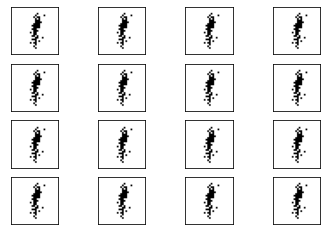

In [5]:
produce_plot("model/og_model")

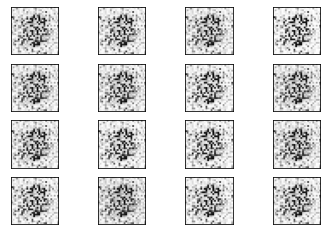

In [6]:
produce_plot("model/wasserstein_model")